In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from numpy import concatenate
from sklearn.semi_supervised import SelfTrainingClassifier

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from sklearn import model_selection
from numpy import mean
from numpy import std
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.semi_supervised import LabelPropagation
import numpy as np
from matplotlib.offsetbox import AnchoredText
from sklearn.model_selection import StratifiedKFold

C:\Users\AMD\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\AMD\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\AMD\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 6)

import math
import numpy as np

seed = 42
np.random.seed(seed)

import os
import pandas as pd
from collections import defaultdict
from Bio import SeqIO
from nltk import bigrams
from nltk import trigrams

import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from sklearn.metrics import matthews_corrcoef

from keras.layers import Dropout
from keras.layers import Input, Dense, Lambda, LSTM
from keras.models import Model
#from keras import backend as K
#from keras import objectives
from keras.datasets import mnist
from keras import regularizers
from keras.layers import GaussianNoise
from keras.layers import Activation
from keras.callbacks import LearningRateScheduler, EarlyStopping

#from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras import regularizers
#from keras.regularizers import l2, activity_l2, l1, activity_l1
#from keras.optimizers import Adam, SGD

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


import dask.dataframe as dd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from scipy import interp
from itertools import cycle
from scipy import stats
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt
from sklearn.semi_supervised import LabelSpreading
from sklearn.semi_supervised import LabelPropagation
from sklearn.datasets import make_circles
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors


glove_input_file = r"C:\Users\AMD\Desktop\New folder\New_gloves.txt"
word2vec_output_file = 'glove_to_word2vec.txt'
glove2word2vec(glove_input_file, word2vec_output_file)
#new_model =KeyedVectors.load_word2vec_format('glove_to_word2vec.txt',binary=False)

2022-03-27 01:35:54,323 : INFO : NumExpr defaulting to 8 threads.
2022-03-27 01:35:54,461 : INFO : converting 8963 vectors from C:\Users\AMD\Desktop\New folder\New_gloves.txt to glove_to_word2vec.txt


(8963, 200)

In [3]:
#new_model = gensim.models.Word2Vec.load('word2vec_model_current')
new_model = gensim.models.Word2Vec.load('word2vec_model_current')
temp_word = np.zeros(shape=(1506,200))
for index, record in enumerate(SeqIO.parse(r"Metal_Training_Old.fasta",'fasta')):
    sum_of_sequence = 0
    tri_tokens = trigrams(record.seq)
    tri_tokens=list(tri_tokens)
    #tri_tokens=tri_tokens[:450]
    for item in ((tri_tokens)):
        tri_str = item[0] + item[1] + item[2]
        if tri_str not in list(new_model.wv.vocab):
            continue
        
        sum_of_sequence = sum_of_sequence + new_model[tri_str]
            
    temp_word[index] = sum_of_sequence/len(sum_of_sequence)
print(len(temp_word))
    


    
    
    
    
#print(new_model['MRI'])
y_temp_word = np.vstack((np.ones((753, 1)), 
                    np.zeros((753,1))))
#Standardize your data
scaler = preprocessing.StandardScaler()
scaled_data=scaler.fit(temp_word)
scaled_data=scaled_data.transform(temp_word)


c, r = y_temp_word.shape
y_temp_word = y_temp_word.reshape(c,)

2022-03-27 01:35:54,624 : INFO : loading Word2Vec object from word2vec_model_current
2022-03-27 01:35:54,740 : INFO : loading wv recursively from word2vec_model_current.wv.* with mmap=None
2022-03-27 01:35:54,740 : INFO : setting ignored attribute vectors_norm to None
2022-03-27 01:35:54,740 : INFO : loading vocabulary recursively from word2vec_model_current.vocabulary.* with mmap=None
2022-03-27 01:35:54,740 : INFO : loading trainables recursively from word2vec_model_current.trainables.* with mmap=None
2022-03-27 01:35:54,740 : INFO : setting ignored attribute cum_table to None
2022-03-27 01:35:54,740 : INFO : loaded word2vec_model_current
<ipython-input-3-ff3f6139cda4>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  sum_of_sequence = sum_of_sequence + new_model[tri_str]


1506


In [4]:
from sklearn.decomposition import PCA
pca=PCA(10)

#fit data
pca.fit(scaled_data)
print(pca.components_)
print(pca.explained_variance_ratio_)
scaled_data=pca.transform(scaled_data)

[[-0.05715327 -0.08140802 -0.03206163 ... -0.03429206  0.0778226
   0.03615267]
 [-0.00508751 -0.02573004  0.03123164 ... -0.15741777 -0.05955115
  -0.23445724]
 [-0.14143108 -0.00833619  0.06580223 ...  0.15123213 -0.06039239
   0.053318  ]
 ...
 [-0.19825436  0.02042035 -0.06543097 ... -0.06892524 -0.00039495
   0.01836501]
 [ 0.00735416 -0.02190001  0.03922594 ... -0.13683637  0.03163503
  -0.06640844]
 [ 0.0649222   0.01344376 -0.11836886 ...  0.00866837 -0.00949421
   0.05066466]]
[0.73583985 0.0557759  0.03640787 0.01440069 0.01152736 0.00747633
 0.00604609 0.00540575 0.00492026 0.00406645]


# 70% unlabeled, 30% labeled

In [5]:
subset = np.random.choice(y_temp_word.shape[0], 497, replace=False)
seventy_y_temp_word=y_temp_word[subset]
seventy_scaled_data=scaled_data[subset]

C:\Users\AMD\anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


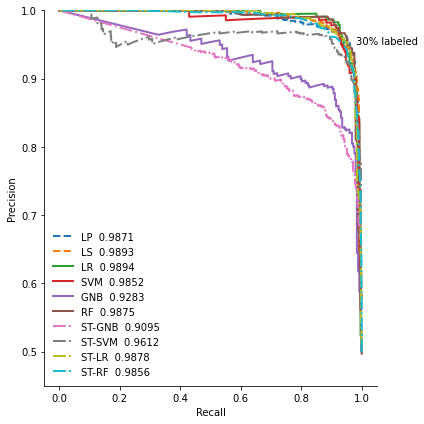

In [6]:


aucs=[]
recalls=[]
precisions=[]
#recalls_mean
#precisions_mean
mean_prec = np.linspace(0, 1, 100)
mena_avg_precision=[]
avg_precision=[]
AP=[]
avg_precision=[]


models=[]
models.append(("LP",LabelPropagation(kernel='rbf',gamma=1, max_iter=50,tol=1e3)))
#LabelPropagation(kernel='rbf',gamma=1, max_iter=50,tol=1e3)
models.append(("LS", LabelSpreading(kernel='knn', alpha=0.2, max_iter=30,n_neighbors=7,tol=1e-6)))
#models.append(("KNN", KNeighborsClassifier()))
models.append(("LR", LogisticRegression(random_state=1,penalty='l2')))
models.append(("SVM",SVC(probability=True)))
models.append(('GNB',GaussianNB()))
models.append(('RF', RandomForestClassifier(random_state=1)))
models.append(('ST-GNB', SelfTrainingClassifier(GaussianNB())))
models.append(('ST-SVM', SelfTrainingClassifier(SVC(probability=True, gamma="auto"))))
models.append(('ST-LR', SelfTrainingClassifier(LogisticRegression(random_state=1))))
models.append(('ST-RF', SelfTrainingClassifier(RandomForestClassifier(random_state=1))))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','yellow','blue','deepskyblue','magenta','black'])


mean_tpr = 0.0
mean_precision=[]
mean_recall=[]


recal = []
aucs = []



for name,model in models:
    y_true=[]
    y_proba=[]
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    if name=="LP" or name== "LS" or name=="ST-GNB" or name=="ST-SVM" or name=="ST-LR" or name=="ST-RF" :

        
        for (train_indexes, test_indexes),color in zip(skf.split(scaled_data, y_temp_word),colors):
            X_train,X_test = scaled_data[train_indexes], scaled_data[test_indexes]
            y_train,y_test = y_temp_word[train_indexes], y_temp_word[test_indexes]
            
            subset = np.random.choice(y_train.size, 949, replace=False)
            y_train[subset] = -1
            
            model.fit(X_train, y_train)
            proba_= model.predict_proba(X_test)
            pos_probs=proba_[:,1]
            pos_probs=np.nan_to_num(pos_probs)
            y_true=np.append(y_true,y_test)
            y_proba=np.append(y_proba,pos_probs)         
       
    
    else:
        for (train_indexes, test_indexes),color in zip(skf.split(seventy_scaled_data, seventy_y_temp_word),colors):
            X_train,X_test = seventy_scaled_data[train_indexes], seventy_scaled_data[test_indexes]
            y_train,y_test = seventy_y_temp_word[train_indexes], seventy_y_temp_word[test_indexes]
            
            model.fit(X_train, y_train)
            proba_= model.predict_proba(X_test)
            pos_probs=proba_[:,1]
            pos_probs=np.nan_to_num(pos_probs)
            y_true=np.append(y_true,y_test)
            y_proba=np.append(y_proba,pos_probs)
            
                      
               
    



    #print(mena_avg_precision)

    
    #pyplot.plot(recall, precision, marker='.',label=r'Mean precision-recall of %s (AUC = %0.4f )' % (name,average_precision),lw=2, alpha=1)

    y_true=y_true
    y_proba=y_proba
    precision, recall,thresholds = precision_recall_curve(y_true, y_proba)
    
    average_precision = average_precision_score(y_true, y_proba)

    if name=="LP" or name== "LS"  :
        plt.plot(recall, precision,label=r'%s  %0.4f ' % (name,average_precision),lw=2,alpha=1,ls='--')
    
    elif  name=="ST-GNB" or name=="ST-SVM" or name=="ST-LR" or name=="ST-RF" :
        plt.plot(recall, precision,label=r'%s  %0.4f ' % (name,average_precision),lw=2,alpha=1,ls='-.')

    else:
        plt.plot(recall, precision,label=r'%s  %0.4f ' % (name,average_precision),lw=2,alpha=1)
    #average_precision = average_precision_score(y_test, y_score)
    
    #disp = plot_precision_recall_curve(classifier, X_test, y_test)
    #disp.ax_.set_title('2-class Precision-Recall curve: '
    #               'AP={0:0.2f}'.format(average_precision))
    
    #plt.plot(recall, precision,label=r'%s  %0.4f ' % (name,average_precision),lw=2,alpha=1)

    #disp = plot_precision_recall_curve(model, X_test, y_test)
    #disp.ax_.set_title('2-class Precision-Recall curve: '
    #               'AP={0:0.2f}'.format(average_precision))
    
#plt.gca().spines['bottom'].set_position('zero')
#plt.figure(figsize=(2, 4))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylim(0.45,1,0.5)

plt.text(0.98, 0.95, '30% labeled', fontsize=10,
        verticalalignment='baseline')


# show the legend
plt.legend(frameon=False)
plt.savefig("30%PR-Curve.png", dpi=1200)
# show the plot
plt.tight_layout()
plt.show()


# 80% unlabeled, 20% labeled

In [7]:
subset = np.random.choice(y_temp_word.shape[0],331, replace=False)
eighty_y_temp_word=y_temp_word[subset]
eighty_scaled_data=scaled_data[subset]

C:\Users\AMD\anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


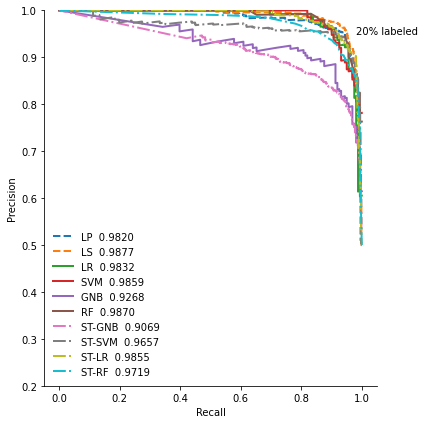

In [8]:


aucs=[]
recalls=[]
precisions=[]
#recalls_mean
#precisions_mean
mean_prec = np.linspace(0, 1, 100)
mena_avg_precision=[]
avg_precision=[]
AP=[]
avg_precision=[]


models=[]
models.append(("LP",LabelPropagation(kernel='rbf',gamma=1, max_iter=50,tol=1e3)))
#LabelPropagation(kernel='rbf',gamma=1, max_iter=50,tol=1e3)
models.append(("LS", LabelSpreading(kernel='knn', alpha=0.2, max_iter=30,n_neighbors=7,tol=1e-6)))
#models.append(("KNN", KNeighborsClassifier()))
models.append(("LR", LogisticRegression(random_state=1,penalty='l2')))
models.append(("SVM",SVC(probability=True)))
models.append(('GNB',GaussianNB()))
models.append(('RF', RandomForestClassifier(random_state=1)))
models.append(('ST-GNB', SelfTrainingClassifier(GaussianNB())))
models.append(('ST-SVM', SelfTrainingClassifier(SVC(probability=True, gamma="auto"))))
models.append(('ST-LR', SelfTrainingClassifier(LogisticRegression(random_state=1))))
models.append(('ST-RF', SelfTrainingClassifier(RandomForestClassifier(random_state=1))))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','yellow','blue','deepskyblue'])


mean_tpr = 0.0
mean_precision=[]
mean_recall=[]


recal = []
aucs = []



for name,model in models:
    y_true=[]
    y_proba=[]
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    if name=="LP" or name== "LS" or name=="ST-GNB" or name=="ST-SVM" or name=="ST-LR" or name=="ST-RF" :

        
        for (train_indexes, test_indexes),color in zip(skf.split(scaled_data, y_temp_word),colors):
            X_train,X_test = scaled_data[train_indexes], scaled_data[test_indexes]
            y_train,y_test = y_temp_word[train_indexes], y_temp_word[test_indexes]
            
            subset = np.random.choice(y_train.size, 1084, replace=False)
            y_train[subset] = -1
            
            model.fit(X_train, y_train)
            proba_= model.predict_proba(X_test)
            pos_probs=proba_[:,1]
            pos_probs=np.nan_to_num(pos_probs)
            y_true=np.append(y_true,y_test)
            y_proba=np.append(y_proba,pos_probs)         
       
    
    else:
        for (train_indexes, test_indexes),color in zip(skf.split(eighty_scaled_data, eighty_y_temp_word),colors):
            X_train,X_test = eighty_scaled_data[train_indexes], eighty_scaled_data[test_indexes]
            y_train,y_test = eighty_y_temp_word[train_indexes], eighty_y_temp_word[test_indexes]
            
            model.fit(X_train, y_train)
            proba_= model.predict_proba(X_test)
            pos_probs=proba_[:,1]
            pos_probs=np.nan_to_num(pos_probs)
            y_true=np.append(y_true,y_test)
            y_proba=np.append(y_proba,pos_probs)
            
                      
               
    



    #print(mena_avg_precision)

    
    #pyplot.plot(recall, precision, marker='.',label=r'Mean precision-recall of %s (AUC = %0.4f )' % (name,average_precision),lw=2, alpha=1)

    y_true=y_true
    y_proba=y_proba
    precision, recall,thresholds = precision_recall_curve(y_true, y_proba)
    
    average_precision = average_precision_score(y_true, y_proba)

    
    #average_precision = average_precision_score(y_test, y_score)
    
    #disp = plot_precision_recall_curve(classifier, X_test, y_test)
    #disp.ax_.set_title('2-class Precision-Recall curve: '
    #               'AP={0:0.2f}'.format(average_precision))
    
    
    if name=="LP" or name== "LS"  :
        plt.plot(recall, precision,label=r'%s  %0.4f ' % (name,average_precision),lw=2,alpha=1,ls='--')
    
    elif  name=="ST-GNB" or name=="ST-SVM" or name=="ST-LR" or name=="ST-RF" :
        plt.plot(recall, precision,label=r'%s  %0.4f ' % (name,average_precision),lw=2,alpha=1,ls='-.')

    else:
        plt.plot(recall, precision,label=r'%s  %0.4f ' % (name,average_precision),lw=2,alpha=1)
    
    
    
    
    #plt.plot(recall, precision,label=r'%s  %0.4f ' % (name,average_precision),lw=2,alpha=1)

    #disp = plot_precision_recall_curve(model, X_test, y_test)
    #disp.ax_.set_title('2-class Precision-Recall curve: '
    #               'AP={0:0.2f}'.format(average_precision))
    
#plt.gca().spines['bottom'].set_position('zero')
#plt.figure(figsize=(2, 4))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylim(0.2,1,0.4)

plt.text(0.98, 0.95, '20% labeled', fontsize=10,
        verticalalignment='baseline')


# show the legend
plt.legend(frameon=False)
plt.savefig("20%PR-Curve.png", dpi=1200)
# show the plot
plt.tight_layout()
plt.show()


# 90% unlabeled, 10% labeled

In [9]:
subset = np.random.choice(y_temp_word.shape[0],166, replace=False)
ninety_y_temp_word=y_temp_word[subset]
ninety_scaled_data=scaled_data[subset]

C:\Users\AMD\anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


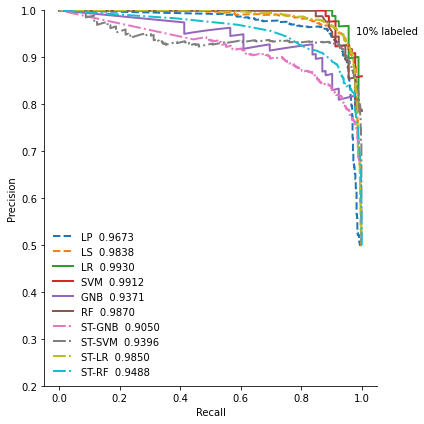

In [10]:


aucs=[]
recalls=[]
precisions=[]
#recalls_mean
#precisions_mean
mean_prec = np.linspace(0, 1, 100)
mena_avg_precision=[]
avg_precision=[]
AP=[]
avg_precision=[]


models=[]
models.append(("LP",LabelPropagation(kernel='rbf',gamma=1, max_iter=50,tol=1e3)))
#LabelPropagation(kernel='rbf',gamma=1, max_iter=50,tol=1e3)
models.append(("LS", LabelSpreading(kernel='knn', alpha=0.2, max_iter=30,n_neighbors=7,tol=1e-6)))
#models.append(("KNN", KNeighborsClassifier()))
models.append(("LR", LogisticRegression(random_state=1,penalty='l2')))
models.append(("SVM",SVC(probability=True)))
models.append(('GNB',GaussianNB()))
models.append(('RF', RandomForestClassifier(random_state=1)))
models.append(('ST-GNB', SelfTrainingClassifier(GaussianNB())))
models.append(('ST-SVM', SelfTrainingClassifier(SVC(probability=True, gamma="auto"))))
models.append(('ST-LR', SelfTrainingClassifier(LogisticRegression(random_state=1))))
models.append(('ST-RF', SelfTrainingClassifier(RandomForestClassifier(random_state=1))))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','yellow','blue','deepskyblue'])


mean_tpr = 0.0
mean_precision=[]
mean_recall=[]


recal = []
aucs = []



for name,model in models:
    y_true=[]
    y_proba=[]
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    if name=="LP" or name== "LS" or name=="ST-GNB" or name=="ST-SVM" or name=="ST-LR" or name=="ST-RF" :

        
        for (train_indexes, test_indexes),color in zip(skf.split(scaled_data, y_temp_word),colors):
            X_train,X_test = scaled_data[train_indexes], scaled_data[test_indexes]
            y_train,y_test = y_temp_word[train_indexes], y_temp_word[test_indexes]
            
            subset = np.random.choice(y_train.size, 1220, replace=False)
            y_train[subset] = -1
            
            model.fit(X_train, y_train)
            proba_= model.predict_proba(X_test)
            pos_probs=proba_[:,1]
            pos_probs=np.nan_to_num(pos_probs)
            y_true=np.append(y_true,y_test)
            y_proba=np.append(y_proba,pos_probs)         
       
    
    else:
        for (train_indexes, test_indexes),color in zip(skf.split(ninety_scaled_data, ninety_y_temp_word),colors):
            X_train,X_test = ninety_scaled_data[train_indexes], ninety_scaled_data[test_indexes]
            y_train,y_test = ninety_y_temp_word[train_indexes], ninety_y_temp_word[test_indexes]
            
            model.fit(X_train, y_train)
            proba_= model.predict_proba(X_test)
            pos_probs=proba_[:,1]
            pos_probs=np.nan_to_num(pos_probs)
            y_true=np.append(y_true,y_test)
            y_proba=np.append(y_proba,pos_probs)
            
                      
               
    



    #print(mena_avg_precision)

    
    #pyplot.plot(recall, precision, marker='.',label=r'Mean precision-recall of %s (AUC = %0.4f )' % (name,average_precision),lw=2, alpha=1)

    y_true=y_true
    y_proba=y_proba
    precision, recall,thresholds = precision_recall_curve(y_true, y_proba)
    
    average_precision = average_precision_score(y_true, y_proba)

    
    #average_precision = average_precision_score(y_test, y_score)
    
    #disp = plot_precision_recall_curve(classifier, X_test, y_test)
    #disp.ax_.set_title('2-class Precision-Recall curve: '
    #               'AP={0:0.2f}'.format(average_precision))
    
    if name=="LP" or name== "LS"  :
        plt.plot(recall, precision,label=r'%s  %0.4f ' % (name,average_precision),lw=2,alpha=1,ls='--')
    
    elif  name=="ST-GNB" or name=="ST-SVM" or name=="ST-LR" or name=="ST-RF" :
        plt.plot(recall, precision,label=r'%s  %0.4f ' % (name,average_precision),lw=2,alpha=1,ls='-.')

    else:
        plt.plot(recall, precision,label=r'%s  %0.4f ' % (name,average_precision),lw=2,alpha=1)
    #plt.plot(recall, precision,label=r'%s  %0.4f ' % (name,average_precision),lw=2,alpha=1)

    #disp = plot_precision_recall_curve(model, X_test, y_test)
    #disp.ax_.set_title('2-class Precision-Recall curve: '
    #               'AP={0:0.2f}'.format(average_precision))
    
#plt.gca().spines['bottom'].set_position('zero')
#plt.figure(figsize=(2, 4))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylim(0.2,1,0.4)

plt.text(0.98, 0.95, '10% labeled', fontsize=10,
        verticalalignment='baseline')


# show the legend
plt.legend(frameon=False)
plt.savefig("10%PR-Curve.png", dpi=1200)
# show the plot
plt.tight_layout()
plt.show()


# 95% unlabeled, 5% labeled

In [11]:
subset = np.random.choice(y_temp_word.shape[0],83, replace=False)
ninefive_y_temp_word=y_temp_word[subset]
ninefive_scaled_data=scaled_data[subset]

C:\Users\AMD\anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\AMD\anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarnin

LR 74
LR 74
LR 74
LR 75
LR 75
LR 75
LR 75
LR 75
LR 75
LR 75
SVM 74
SVM 74
SVM 74
SVM 75
SVM 75
SVM 75
SVM 75
SVM 75
SVM 75
SVM 75
GNB 74
GNB 74
GNB 74
GNB 75
GNB 75
GNB 75
GNB 75
GNB 75
GNB 75
GNB 75
RF 74
RF 74
RF 74
RF 75
RF 75
RF 75
RF 75
RF 75
RF 75
RF 75


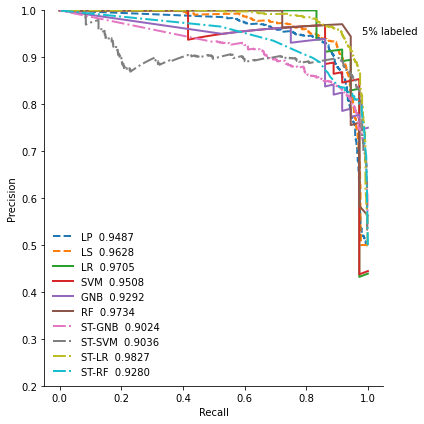

In [12]:


aucs=[]
recalls=[]
precisions=[]
#recalls_mean
#precisions_mean
mean_prec = np.linspace(0, 1, 100)
mena_avg_precision=[]
avg_precision=[]
AP=[]
avg_precision=[]


models=[]
models.append(("LP",LabelPropagation(kernel='rbf',gamma=1, max_iter=50,tol=1e3)))
#LabelPropagation(kernel='rbf',gamma=1, max_iter=50,tol=1e3)
models.append(("LS", LabelSpreading(kernel='knn', alpha=0.2, max_iter=30,n_neighbors=7,tol=1e-6)))
#models.append(("KNN", KNeighborsClassifier()))
models.append(("LR", LogisticRegression(random_state=1,penalty='l2')))
models.append(("SVM",SVC(probability=True)))
models.append(('GNB',GaussianNB()))
models.append(('RF', RandomForestClassifier(random_state=1)))
models.append(('ST-GNB', SelfTrainingClassifier(GaussianNB())))
models.append(('ST-SVM', SelfTrainingClassifier(SVC(probability=True, gamma="auto"))))
models.append(('ST-LR', SelfTrainingClassifier(LogisticRegression(random_state=1))))
models.append(('ST-RF', SelfTrainingClassifier(RandomForestClassifier(random_state=1))))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','yellow','blue','deepskyblue'])


mean_tpr = 0.0
mean_precision=[]
mean_recall=[]


recal = []
aucs = []



for name,model in models:
    y_true=[]
    y_proba=[]
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    if name=="LP" or name== "LS" or name=="ST-GNB" or name=="ST-SVM" or name=="ST-LR" or name=="ST-RF" :

        
        for (train_indexes, test_indexes),color in zip(skf.split(scaled_data, y_temp_word),colors):
            X_train,X_test = scaled_data[train_indexes], scaled_data[test_indexes]
            y_train,y_test = y_temp_word[train_indexes], y_temp_word[test_indexes]
            
            subset = np.random.choice(y_train.size, 1288, replace=False)
            y_train[subset] = -1
            
            model.fit(X_train, y_train)
            proba_= model.predict_proba(X_test)
            pos_probs=proba_[:,1]
            pos_probs=np.nan_to_num(pos_probs)
            y_true=np.append(y_true,y_test)
            y_proba=np.append(y_proba,pos_probs)         
       
    
    else:
        for (train_indexes, test_indexes),color in zip(skf.split(ninefive_scaled_data, ninefive_y_temp_word),colors):
            X_train,X_test = ninefive_scaled_data[train_indexes], ninefive_scaled_data[test_indexes]
            y_train,y_test = ninefive_y_temp_word[train_indexes], ninefive_y_temp_word[test_indexes]
            print(name,y_train.size)
            model.fit(X_train, y_train)
            proba_= model.predict_proba(X_test)
            pos_probs=proba_[:,1]
            pos_probs=np.nan_to_num(pos_probs)
            y_true=np.append(y_true,y_test)
            y_proba=np.append(y_proba,pos_probs)
            
    y_true=y_true
    y_proba=y_proba
    precision, recall,thresholds = precision_recall_curve(y_true, y_proba)
    
    average_precision = average_precision_score(y_true, y_proba)

    
    #average_precision = average_precision_score(y_test, y_score)
    
    #disp = plot_precision_recall_curve(classifier, X_test, y_test)
    #disp.ax_.set_title('2-class Precision-Recall curve: '
    #               'AP={0:0.2f}'.format(average_precision))
    
    if name=="LP" or name== "LS"  :
        plt.plot(recall, precision,label=r'%s  %0.4f ' % (name,average_precision),lw=2,alpha=1,ls='--')
    
    elif  name=="ST-GNB" or name=="ST-SVM" or name=="ST-LR" or name=="ST-RF" :
        plt.plot(recall, precision,label=r'%s  %0.4f ' % (name,average_precision),lw=2,alpha=1,ls='-.')

    else:
        plt.plot(recall, precision,label=r'%s  %0.4f ' % (name,average_precision),lw=2,alpha=1)
    #plt.plot(recall, precision,label=r'%s  %0.4f ' % (name,average_precision),lw=2,alpha=1)

    #disp = plot_precision_recall_curve(model, X_test, y_test)
    #disp.ax_.set_title('2-class Precision-Recall curve: '
    #               'AP={0:0.2f}'.format(average_precision))
    
#plt.gca().spines['bottom'].set_position('zero')
#plt.figure(figsize=(2, 4))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylim(0.2,1,0.4)

plt.text(0.98, 0.95, '5% labeled', fontsize=10,
        verticalalignment='baseline')


# show the legend
plt.legend(frameon=False)
plt.savefig("5%PR-Curve.png", dpi=1200)
# show the plot
plt.tight_layout()
plt.show()
